<a href="https://colab.research.google.com/github/bdgToji/VNP/blob/main/KOL1_Decision_Tree_Water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix, mean_squared_error
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/content/drive/MyDrive/VNP/water_potability.csv')

In [4]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [5]:
df = df.drop(columns=['Sulfate','Conductivity','Organic_carbon','Trihalomethanes'])

In [6]:
df

,ph,Hardness,Solids,Chloramines,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,4.075075,0
...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,4.708658,1


In [7]:
df.isna().sum()

ph             491
Hardness         0
Solids           0
Chloramines      0
Turbidity        0
Potability       0
dtype: int64

In [8]:
df = df.bfill()

In [10]:
df.isna().sum()

ph             0
Hardness       0
Solids         0
Chloramines    0
Turbidity      0
Potability     0
dtype: int64

In [11]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

<Axes: >

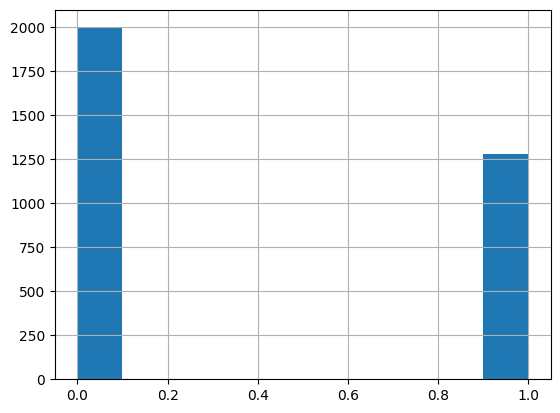

In [12]:
df['Potability'].hist()

In [15]:
X, Y = df.drop(columns=['Potability']), df['Potability']

In [13]:
cv = KFold(5)

In [14]:
params = {
    'criterion': ['entropy', 'gini', 'log_loss'],
    'max_depth': 15,
    'min_samples_split': range(20, 50, 5)
}

In [17]:
best_score = -1
best_crit = -1
best_depth = params['max_depth']
best_split = -1
for crit in params['criterion']:
    for split in params['min_samples_split']:
      clf = DecisionTreeClassifier(criterion=crit, max_depth=best_depth, min_samples_split=split)
      predictions = cross_val_predict(clf, X, Y, cv=cv)
      f = f1_score(Y, predictions)
      if f > best_score:
        best_score = f
        best_crit = crit
        best_depth = best_depth
        best_split = split

In [18]:
best_score, best_crit, best_depth, best_split

(0.3811581676750216, 'gini', 15, 20)

In [19]:
clf = DecisionTreeClassifier(criterion=best_crit, max_depth=best_depth, min_samples_split=best_split)

In [20]:
predictions = cross_val_predict(clf, X, Y, cv=cv)

In [21]:
f1_score(Y, predictions)

0.3901808785529716

In [23]:
print(classification_report(Y, predictions))

              precision    recall  f1-score   support

           0       0.63      0.70      0.67      1998
           1       0.43      0.35      0.39      1278

    accuracy                           0.57      3276
   macro avg       0.53      0.53      0.53      3276
weighted avg       0.55      0.57      0.56      3276

